#### This ntb is meant as an update of CEE countries (and regions) competitivness.
The main focus will be on the current value of ULC (Unit Laboru Cost) as outlined by Dustmann et al. (2014) for Germany (or maybe its preliminary version)
and some Figures summing up sectoral specialization inspired by Schröder (2020) - underlying question: is Manufacturing core holding, and is it still bind together by attraction of the lowest ULC?

In [152]:
import pandas as pd
#import pandas_datareader as pdr
import requests
import eurostat
import pyreadr

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from helper import (oecd_res2df, harmonise_base_year, do_fuzzy_search, get_regions, plot_ols_trend, eu, visegrad,
                    CEE_non_core, germany_plus, southern, west, north, emu, eu)

In [219]:
from importlib import reload
import helper
reload(helper)
from helper import (oecd_res2df, harmonise_base_year, do_fuzzy_search, get_regions, plot_ols_trend)

### Dustmann (2014) - Figure 1 = ULC

In [107]:
### Dustmann (2014) - Figure 1
# 'ULC_EEQ'
#ulc_eeq_query = "https://stats.oecd.org/SDMX-JSON/data/ULC_EEQ/AUS+AUT+BEL+CAN+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA.ULQEUL01+ULQECU01+ULQELP01.IXOB+IXOBSA+GPSA+GYSA.Q/all?startTime=2010-Q1&endTime=2022-Q1&dimensionAtObservation=allDimensions"
ulc_eeq_query = "https://stats.oecd.org/SDMX-JSON/data/ULC_EEQ/AUS+AUT+BEL+CAN+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA.ULQEUL01.IXOB.Q/all?startTime=2010-Q1&endTime=2022-Q1&dimensionAtObservation=allDimensions"

In [ ]:
r = requests.get(ulc_eeq_query)
r_dt = r.json()
df = oecd_res2df(r_dt)
df.info()
df.head()

ulc_df = df.melt(id_vars=['country'], var_name='quarter', value_name='index')
ulc_df['index'] = ulc_df['index'].astype('float')

In [234]:
t_period = ulc_df["quarter"].str.split("-", n = 1, expand = True)
ulc_df['year'] = t_period[0].astype('int')
ulc_df = ulc_df.sort_values('year')
ulc_yr = ulc_df.groupby(['country', 'year']).agg({'index': 'mean'}).reset_index()

ulc_yr['region'] = np.where(ulc_yr['country'].isin(visegrad.values()), "visegrad", 
                            np.where(ulc_yr['country'].isin(southern.values()), 'south',
                                     np.where(ulc_yr['country'].isin(germany_plus.values()), 'DE_AT',
                                              np.where(ulc_yr['country'].isin(west.values()), 'west',
                                                       np.where(ulc_yr['country'].isin(north.values()), 'north',
                                                                np.where(ulc_yr['country'].isin(CEE_non_core.values()), 'CEE_non_core', 'rest')
                                                               )
                                                        )
                                                ) 
                                    )
                            )


### The picture below suggest:
- higher ULC growth in CEE since 2015 than in the Western Europe
- development in the rest of the CEE is similar (this can be important as they are possible competitors) NOTE: RO+BG note contained
- continuos rise of the ULC after 2019 while the West goes to a decrease
- examining the components of the time series, we can see that the rise is comprised above all of rising per employee compensation (higher than in DE) and not so fast rising physical productivity (in the the sense of GDP per employee change, NOTE: however that productivity is actually rising faster in CEE than in the West)

Does this threaten the CEE position as Manufacturing Core? Is it a sign of transformation of the economic model

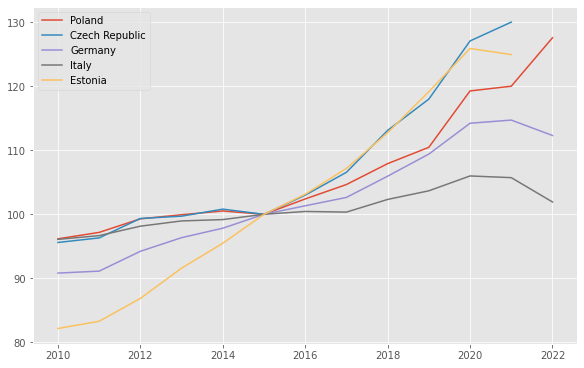

In [232]:
ulc_yr_plot = ulc_yr.groupby('country')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(ulc_yr_plot.get_group('Poland')['year'], ulc_yr_plot.get_group('Poland')['index'], label='Poland')
    ax.plot(ulc_yr_plot.get_group('Czech Republic')['year'], ulc_yr_plot.get_group('Czech Republic')['index'], label='Czech Republic')
    ax.plot(ulc_yr_plot.get_group('Germany')['year'], ulc_yr_plot.get_group('Germany')['index'], label='Germany')
    ax.plot(ulc_yr_plot.get_group('Italy')['year'], ulc_yr_plot.get_group('Italy')['index'], label='Italy')
    ax.plot(ulc_yr_plot.get_group('Estonia')['year'], ulc_yr_plot.get_group('Estonia')['index'], label='Estonia')
    #ax.plot(ulc_yr_plot.get_group('Türkiye')['year'], ulc_yr_plot.get_group('Türkiye')['index'], label='Türkiye') # NOTE: extreme values for Turkey


    ax.legend()

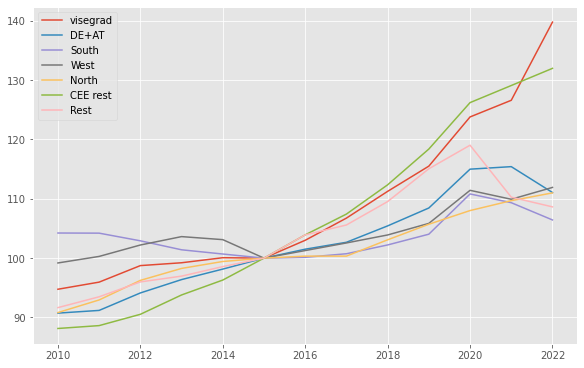

In [240]:
ulc_yr_regions = ulc_yr.groupby(['region', 'year']).agg({'index': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(ulc_yr_regions.get_group('visegrad')['year'], ulc_yr_regions.get_group('visegrad')['index'], label='visegrad')
    ax.plot(ulc_yr_regions.get_group('DE_AT')['year'], ulc_yr_regions.get_group('DE_AT')['index'], label='DE+AT')
    ax.plot(ulc_yr_regions.get_group('south')['year'], ulc_yr_regions.get_group('south')['index'], label='South')
    ax.plot(ulc_yr_regions.get_group('west')['year'], ulc_yr_regions.get_group('west')['index'], label='West')
    ax.plot(ulc_yr_regions.get_group('north')['year'], ulc_yr_regions.get_group('north')['index'], label='North')
    ax.plot(ulc_yr_regions.get_group('CEE_non_core')['year'], ulc_yr_regions.get_group('CEE_non_core')['index'], label='CEE rest')
    ax.plot(ulc_yr_regions.get_group('rest')['year'], ulc_yr_regions.get_group('rest')['index'], label='Rest')
# NOTE: no RO + BG in OECD data -  CEE rest are only Baltics


    ax.legend()

In [236]:
ulc_yr.groupby(['region', 'year']).get_group(('rest', 2014))['country'].unique()

array(['Australia', 'Israel', 'Japan', 'Korea', 'New Zealand',
       'Switzerland', 'Türkiye'], dtype=object)

### Specialization on Manufacturing - still relevant?

In [ ]:
# nama_10_a10
# nama_10_a10_e
# resp. regional: NAMA_10R_2EMHRW

# OECD SNA_TABLE6 ???

##### Employment

In [210]:
nama_10_a10_e = eurostat.get_data_df("nama_10_a10_e").rename(columns={"geo\\time": "Country"})
nama_10_a10_e = nama_10_a10_e.loc[np.where((
                                  (nama_10_a10_e['unit'] == "PC_TOT_HW") & # Percentage of total (based on hours worked)
                                  (nama_10_a10_e['na_item'] == "EMP_DC") &
                                  (nama_10_a10_e['nace_r2'] == "C")
                                ))]
spec_employ = nama_10_a10_e.melt(id_vars = ['Country', 'nace_r2'], value_vars = range(2005, 2021),
                   var_name = 'year', value_name = 'employ_share')
spec_employ['year'] = spec_employ['year'].astype(int)
spec_employ = get_regions(spec_employ, 'Country')

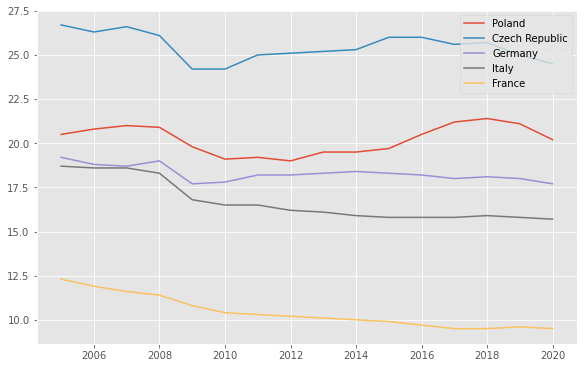

In [211]:
# Figure 2
spec_employ_plot = spec_employ.groupby('Country')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_employ_plot.get_group('PL')['year'], spec_employ_plot.get_group('PL')['employ_share'], label='Poland')
    ax.plot(spec_employ_plot.get_group('CZ')['year'], spec_employ_plot.get_group('CZ')['employ_share'], label='Czech Republic')
    ax.plot(spec_employ_plot.get_group('DE')['year'], spec_employ_plot.get_group('DE')['employ_share'], label='Germany')
    ax.plot(spec_employ_plot.get_group('IT')['year'], spec_employ_plot.get_group('IT')['employ_share'], label='Italy')
    ax.plot(spec_employ_plot.get_group('FR')['year'], spec_employ_plot.get_group('FR')['employ_share'], label='France')

    ax.legend()

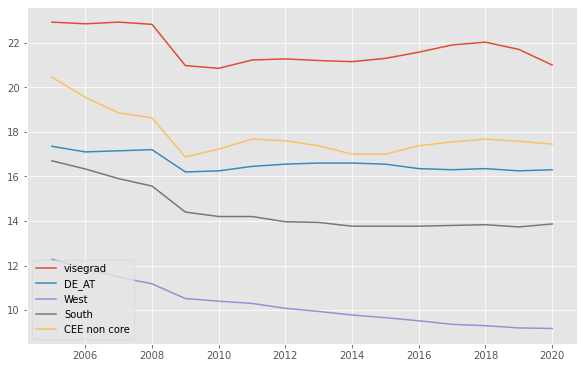

In [212]:
# Figure 2 - aggregated regions
spec_employ_regions = spec_employ.groupby(['region', 'year']).agg({'employ_share': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_employ_regions.get_group('visegrad')['year'], spec_employ_regions.get_group('visegrad')['employ_share'], label='visegrad')
    ax.plot(spec_employ_regions.get_group('DE_AT')['year'], spec_employ_regions.get_group('DE_AT')['employ_share'], label='DE_AT')
    ax.plot(spec_employ_regions.get_group('west')['year'], spec_employ_regions.get_group('west')['employ_share'], label='West')
    ax.plot(spec_employ_regions.get_group('south')['year'], spec_employ_regions.get_group('south')['employ_share'], label='South')
    #ax.plot(spec_employ_regions.get_group('north')['year'], spec_employ_regions.get_group('north')['employ_share'], label='North')
    ax.plot(spec_employ_regions.get_group('CEE_non_core')['year'], spec_employ_regions.get_group('CEE_non_core')['employ_share'], label='CEE non core')
    ax.legend()

#### Value added

In [62]:
nama_10_a10 = eurostat.get_data_df("nama_10_a10").rename(columns={"geo\\time": "Country"})
nama_10_a10 = nama_10_a10.loc[np.where((
                                  (nama_10_a10['unit'] == "PC_GDP") & # Percentage of gross domestic product (GDP)
                                  (nama_10_a10['na_item'] == "B1G") &
                                  (nama_10_a10['nace_r2'] == "C")
                                ))]
spec_gva = nama_10_a10.melt(id_vars = ['Country', 'nace_r2'], value_vars = range(2005, 2021),
                   var_name = 'year', value_name = 'gva_share')
spec_gva['year'] = spec_gva['year'].astype(int)

spec_gva = get_regions(spec_gva, 'Country')

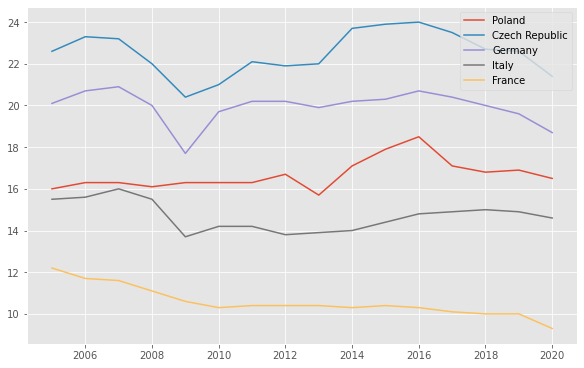

In [61]:
# Figure 3 VA specialization
spec_gva_plot = spec_gva.groupby('Country')

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_gva_plot.get_group('PL')['year'], spec_gva_plot.get_group('PL')['gva_share'], label='Poland')
    ax.plot(spec_gva_plot.get_group('CZ')['year'], spec_gva_plot.get_group('CZ')['gva_share'], label='Czech Republic')
    ax.plot(spec_gva_plot.get_group('DE')['year'], spec_gva_plot.get_group('DE')['gva_share'], label='Germany')
    ax.plot(spec_gva_plot.get_group('IT')['year'], spec_gva_plot.get_group('IT')['gva_share'], label='Italy')
    ax.plot(spec_gva_plot.get_group('FR')['year'], spec_gva_plot.get_group('FR')['gva_share'], label='France')

    ax.legend()

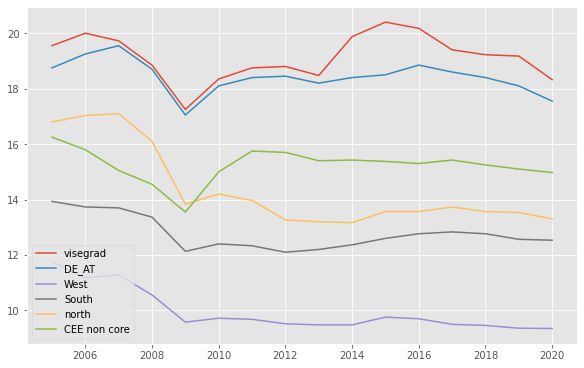

In [64]:
# Figure 2 - aggregated regions
spec_gva_regions = spec_gva.groupby(['region', 'year']).agg({'gva_share': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_gva_regions.get_group('visegrad')['year'], spec_gva_regions.get_group('visegrad')['gva_share'], label='visegrad')
    ax.plot(spec_gva_regions.get_group('DE_AT')['year'], spec_gva_regions.get_group('DE_AT')['gva_share'], label='DE_AT')
    ax.plot(spec_gva_regions.get_group('west')['year'], spec_gva_regions.get_group('west')['gva_share'], label='West')
    ax.plot(spec_gva_regions.get_group('south')['year'], spec_gva_regions.get_group('south')['gva_share'], label='South')
    ax.plot(spec_gva_regions.get_group('north')['year'], spec_gva_regions.get_group('north')['gva_share'], label='north')
    ax.plot(spec_gva_regions.get_group('CEE_non_core')['year'], spec_gva_regions.get_group('CEE_non_core')['gva_share'], label='CEE non core')
    ax.legend()

### Summary:
- obvious divergence in ULC dynamics in the CEE part of labour core - potential to threaten their possition in the EU Value Chain?
- Rest of the CEE seems to have a similar trend in their behaviour
- Corresponding to there seem to be signif decline in the manufacturing specialization measured both in terms of employment and of VA
- Both VA and Employment seem to rise/fall together
- Is the end of Manufacturing Core near?

### Additional Variables - deflators and PPPs
#### World bank GDP deflator: NY.GDP.DEFL.ZS (NY.GDP.DEFL.ZS.AD), NY.GDP.DEFL.KD.ZG.AD
#### or get VA deflator using NV.IND.MANF.KD, NV.IND.MANF.KN (see Golub et al., 2018)

In [4]:
# GDP Deflator: NY.GDP.DEFL.ZS.AD
# TODO: covert to base 2015
gdp_deflator_raw = pd.read_csv("WB_NY.GDP.DEFL.ZS.AD.csv")
val_cols = [f'{2000 + i}' for i in range(4, 22)]
gdp_deflator = gdp_deflator_raw.melt(id_vars=['Country Name', 'Country Code'], value_vars=val_cols)
gdp_deflator['year'] = gdp_deflator['variable'].str.split(" ", n = 1, expand = True)[0].astype(int)
gdp_deflator = gdp_deflator.rename(columns={'Country Name': 'country_name', 'value': 'value_deflator'}).drop('variable', axis=1)
gdp_deflator = gdp_deflator.groupby('country_name').apply(lambda x: harmonise_base_year(x, 2015)) # Harmonize the deflator to 2015 = deflator_2015
gdp_deflator = gdp_deflator.loc[lambda x: ~x['country_name'].isin(['Curacao'])]
gdp_deflator['country_code'] = gdp_deflator['country_name'].apply(lambda x: do_fuzzy_search(x))
gdp_deflator.dropna().head()

,country_name,Country Code,value_deflator,year,deflator_2015,country_code
0,Aruba,ABW,81.766613,2004,0.779280,AW
2,Afghanistan,AFG,50.093030,2004,0.489922,AF
4,Angola,AGO,258.782582,2004,0.302539,AO
5,Albania,ALB,81.209503,2004,0.766989,AL
6,Andorra,AND,88.114116,2004,0.868953,AD


In [5]:
## PPP exchange rate use World Bank: PA.NUS.PPP
ppp_raw =  pd.read_csv("WB_PA.NUS.PPP.csv")
ppp_raw = ppp_raw.melt(id_vars=['Country Name', 'Country Code'], value_vars=val_cols)
ppp_raw['year'] = ppp_raw['variable'].str.split(" ", n = 1, expand = True)[0].astype(int)
ppp_raw = ppp_raw.rename(columns={'Country Name': 'country_name', 'value': 'value_ppp'})
ppp_raw = ppp_raw.loc[lambda x: ~x['country_name'].isin(['Curacao'])]
ppp_raw['country_code'] = ppp_raw['country_name'].apply(lambda x: do_fuzzy_search(x))
ppp_raw = ppp_raw.drop(['variable', 'Country Code'], axis=1)

# market exchange rate: PA.NUS.FCRF
ex = pd.read_csv("WB_PA.NUS.FCRF.csv")
ex = ex.melt(id_vars=['Country Name', 'Country Code'], value_vars=val_cols)
ex['year'] = ex['variable'].str.split(" ", n = 1, expand = True)[0].astype(int)
ex = ex.rename(columns={'Country Name': 'country_name', 'value': 'value_ex'})
ex = ex.loc[lambda x: ~x['country_name'].isin(['Curacao'])]
ex = ex.drop(['variable'], axis=1)

ex_emu = ex[ex["Country Code"] == 'EMU'].rename(columns = {'value_ex': 'value_eur', 'country_name': 'monetary_union'}).drop('Country Code', axis=1) # get Euro ExR
ex['monetary_union'] = np.where(ex['country_name'].isin(emu.values()), "Euro area", "non_emu")
ex = ex.merge(ex_emu, on=['monetary_union', 'year'], how='left')
# NOTE: AS Unido data is in Euro even before country's euro adoption, final_ex_rate = euro rate all the time
ex['final_ex_rate'] = ex['value_eur'].combine_first(ex['value_ex']) # Only diff to value_ex is that Euro area countries have NaNs for Ex after they adopt Euro.
ex['country_code'] = ex['country_name'].apply(lambda x: do_fuzzy_search(x))
ex = ex.drop(['Country Code'], axis=1)
ex.head()

,country_name,value_ex,year,monetary_union,value_eur,final_ex_rate,country_code
0,Aruba,1.790000,2004,non_emu,NaN,1.790000,AW
1,Africa Eastern and Southern,NaN,2004,non_emu,NaN,NaN,NaN
2,Afghanistan,47.845312,2004,non_emu,NaN,47.845312,AF
3,Africa Western and Central,NaN,2004,non_emu,NaN,NaN,NaN
4,Angola,83.541363,2004,non_emu,NaN,83.541363,AO


### EU-KLEMS: More detailed analysis - getting absolute values of ULC
#### Goal: get ULC by own calculation and also on a sectoral level
#### variables description: https://www.dropbox.com/s/ziu7wpl8pgqhq51/Variable%20List.xlsx?dl=0

In [46]:
klems_na = pyreadr.read_r("national accounts.rds")[None]
klems_na = klems_na.astype({"year": int})
klems_na = get_regions(klems_na, 'geo_code')

klems_na.head()

,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,GO_PI,...,H_EMPE,II_CP,II_PI,II_PYP,II_Q,VA_CP,VA_PI,VA_PYP,VA_Q,region
0,A,AT,"Agriculture, forestry and fishing",Austria,1995,363.7,273.10,20.59,7656.1,92.326044,...,39192.0,3843.9,74.985756,4168.299699,5126.173576,3812.3,116.708,3917.4,3266.528430,DE_AT
1,A,AT,"Agriculture, forestry and fishing",Austria,1996,369.6,260.92,20.40,7485.4,89.203056,...,38589.0,3866.6,73.638100,3937.362930,5250.814488,3618.8,110.849,3810.1,3264.621242,DE_AT
2,A,AT,"Agriculture, forestry and fishing",Austria,1997,380.5,254.58,20.88,7632.7,89.326044,...,39008.0,4036.6,74.460979,3991.990935,5421.094460,3596.1,109.807,3630.2,3274.927828,DE_AT
3,A,AT,"Agriculture, forestry and fishing",Austria,1998,382.0,244.97,20.28,7414.2,85.778455,...,38325.0,3893.0,73.579585,3939.633414,5290.869760,3521.2,102.255,3781.2,3443.547993,DE_AT
4,A,AT,"Agriculture, forestry and fishing",Austria,1999,398.4,240.43,20.74,7385.2,83.380806,...,39831.0,3874.4,73.007411,3904.764431,5306.858477,3510.8,97.215,3692.8,3611.376845,DE_AT


In [47]:
klems_na = klems_na.merge(gdp_deflator, left_on=['geo_code', 'year'], right_on=['country_code', 'year'])
klems_na = klems_na.merge(ppp_raw, left_on=['geo_code', 'year'], right_on=['country_code', 'year'], suffixes=['_deflator', '_ppp'])
klems_na = klems_na.merge(ex, left_on=['geo_code', 'year'], right_on=['country_code', 'year'])
klems_na.head()

,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,GO_PI,...,country_code_deflator,country_name_ppp,value_ppp,country_code_ppp,country_name,value_ex,monetary_union,value_eur,final_ex_rate,country_code
0,A,AT,"Agriculture, forestry and fishing",Austria,2004,430.7,219.10,21.57,7627.3,85.966899,...,AT,Austria,0.878078,AT,Austria,NaN,Euro area,0.803922,0.803922,AT
1,B,AT,Mining and quarrying,Austria,2004,330.1,6.52,6.35,1600.5,80.525291,...,AT,Austria,0.878078,AT,Austria,NaN,Euro area,0.803922,0.803922,AT
2,C,AT,Manufacturing,Austria,2004,23030.6,629.64,607.19,120213.3,87.022773,...,AT,Austria,0.878078,AT,Austria,NaN,Euro area,0.803922,0.803922,AT
3,C10-C12,AT,Manufacture of food products; beverages and to...,Austria,2004,2331.9,83.14,79.06,13646.4,82.726602,...,AT,Austria,0.878078,AT,Austria,NaN,Euro area,0.803922,0.803922,AT
4,C13-C15,AT,"Manufacture of textiles, wearing apparel, leat...",Austria,2004,807.3,31.47,29.77,3711.8,88.311639,...,AT,Austria,0.878078,AT,Austria,NaN,Euro area,0.803922,0.803922,AT


In [48]:
# Dustmann (2014): Figure 1 notes: unit labor cost for country i in period t, computed as the total wage bill (w_it*L_it)) divided by the value added of the country’s industry
klems_na['VA_real'] = (klems_na['VA_CP'] / klems_na['deflator_2015']) / klems_na['value_ppp']
klems_na['W_usd'] = klems_na['COMP'] / klems_na['final_ex_rate']
klems_ulc = klems_na.loc[(klems_na['nace_r2_code'].isin(['C', 'TOT']))].assign(ULC = lambda x: x['W_usd'] / x['VA_real']) # TODO: check if correct, get Real ULC!!!
klems_ulc = klems_ulc.assign(productivity = lambda x: x['VA_real'] / x['H_EMP']) # TODO: check Schröder (2020)  see footnote 14 - should be put to real values
klems_ulc.head()

,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,GO_PI,...,country_name,value_ex,monetary_union,value_eur,final_ex_rate,country_code,VA_real,W_usd,ULC,productivity
2,C,AT,Manufacturing,Austria,2004,23030.6,629.64,607.19,120213.3,87.022773,...,Austria,NaN,Euro area,0.803922,0.803922,AT,59114.644795,28647.816694,0.484615,0.055316
55,TOT,AT,Total - all NACE activities,Austria,2004,112760.5,3826.81,3290.10,426015.3,81.927816,...,Austria,NaN,Euro area,0.803922,0.803922,AT,304051.257889,140263.047180,0.461314,0.044725
60,C,AT,Manufacturing,Austria,2005,23745.7,624.22,602.25,127901.9,89.060428,...,Austria,NaN,Euro area,0.803800,0.803800,AT,60424.291575,29541.794379,0.488906,0.057268
113,TOT,AT,Total - all NACE activities,Austria,2005,116392.8,3872.89,3328.45,453972.2,83.913556,...,Austria,NaN,Euro area,0.803800,0.803800,AT,308602.032103,144803.150247,0.469223,0.045468
118,C,AT,Manufacturing,Austria,2006,24650.9,624.88,602.55,140054.3,90.866219,...,Austria,NaN,Euro area,0.796433,0.796433,AT,65635.203756,30951.641041,0.471571,0.062156


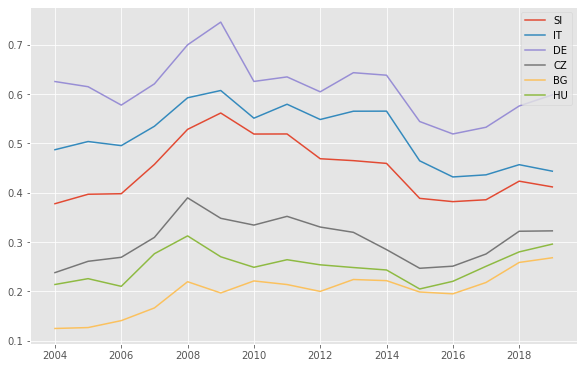

In [49]:
# TODO: this is in national currencies, fix it!
klems_ulc_plot = klems_ulc.groupby(by=['geo_code', 'nace_r2_code'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(klems_ulc_plot.get_group(('SI', 'C'))['year'], klems_ulc_plot.get_group(('SI', 'C'))['ULC'], label='SI')
    ax.plot(klems_ulc_plot.get_group(('IT', 'C'))['year'], klems_ulc_plot.get_group(('IT', 'C'))['ULC'], label='IT')
    ax.plot(klems_ulc_plot.get_group(('DE', 'C'))['year'], klems_ulc_plot.get_group(('DE', 'C'))['ULC'], label='DE')
    ax.plot(klems_ulc_plot.get_group(('CZ', 'C'))['year'], klems_ulc_plot.get_group(('CZ', 'C'))['ULC'], label='CZ')
    ax.plot(klems_ulc_plot.get_group(('BG', 'C'))['year'], klems_ulc_plot.get_group(('BG', 'C'))['ULC'], label='BG')
    ax.plot(klems_ulc_plot.get_group(('HU', 'C'))['year'], klems_ulc_plot.get_group(('HU', 'C'))['ULC'], label='HU')
    #ax.plot(klems_ulc_plot.get_group(('IE', 'C'))['year'], klems_ulc_plot.get_group(('IE', 'C'))['ULC'], label='IE') #NOTE !!!

    ax.legend()


In [50]:
klems_ulc_plot.agg({'ULC': 'mean'}).sort_values(by=['ULC'])

ULC
geo_code nace_r2_code          
RO       C             0.153239
         TOT           0.160296
BG       TOT           0.174823
         C             0.199850
PL       TOT           0.222030
LT       C             0.232229
IE       C             0.235201
PL       C             0.246518
LT       TOT           0.247865
HU       C             0.251409
         TOT           0.269277
SK       TOT           0.270793
CZ       TOT           0.279587
LV       TOT           0.287922
SK       C             0.303206
CZ       C             0.303608
LV       C             0.304363
EE       TOT           0.315667
MT       TOT           0.327661
HR       TOT           0.334697
MT       C             0.354513
EE       C             0.363618
HR       C             0.365304
PT       TOT           0.390744
IT       TOT           0.398893
PT       C             0.417840
SI       TOT           0.421881
CY       TOT           0.431247
IE       TOT           0.431969
SI       C             0.446569
ES       TOT           0.446912
US       C             0.482833
ES       C             0.485359
AT       TOT           0.511438
IT       C             0.516603
AT       C             0.530375
NL       C             0.535854
SE       C             0.538940
DE       TOT           0.540592
US       TOT           0.543328
LU       TOT           0.546891
FI       C             0.550446
NL       TOT           0.550930
JP       C             0.556772
BE       TOT           0.562565
CY       C             0.567859
FI       TOT           0.585227
FR       TOT           0.587679
SE       TOT           0.591220
JP       TOT           0.599884
BE       C             0.603451
DE       C             0.612660
FR       C             0.614617
DK       C             0.705198
         TOT           0.728735
LU       C             0.730781

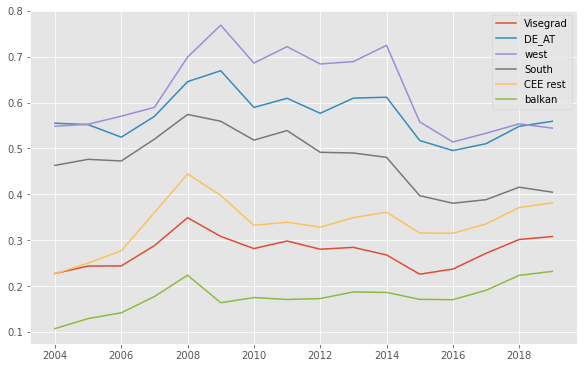

In [54]:
klems_ulc_regions = klems_ulc.groupby(['region', 'nace_r2_code', 'year']).agg({'ULC': 'mean'}).reset_index().groupby(['region', 'nace_r2_code'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(klems_ulc_regions.get_group(('visegrad', 'C'))['year'], klems_ulc_regions.get_group(('visegrad', 'C'))['ULC'], label='Visegrad')
    ax.plot(klems_ulc_regions.get_group(('DE_AT', 'C'))['year'], klems_ulc_regions.get_group(('DE_AT', 'C'))['ULC'], label='DE_AT')
    ax.plot(klems_ulc_regions.get_group(('west', 'C'))['year'], klems_ulc_regions.get_group(('west', 'C'))['ULC'], label='west')
    ax.plot(klems_ulc_regions.get_group(('south', 'C'))['year'], klems_ulc_regions.get_group(('south', 'C'))['ULC'], label='South')
    ax.plot(klems_ulc_regions.get_group(('CEE_non_core', 'C'))['year'], klems_ulc_regions.get_group(('CEE_non_core', 'C'))['ULC'], label='CEE rest') # Includes RO+BG and Baltics
    ax.plot(klems_ulc_regions.get_group(('balkan', 'C'))['year'], klems_ulc_regions.get_group(('balkan', 'C'))['ULC'], label='balkan')


    ax.legend()

### Summary - EU-KLEMS

#### We can see the Manufacturing Core still has a comparetive advantage and that the non-core CEE countries seem not to have substantially lower ULC


### UNIDO Industrial Statistics database  - use for non-EU countries ULC
### Source: Golub et al. (2018)

In [38]:
unido = pd.read_csv('INDSTAT2_Rev3_export.csv') #  NOTE: INDSTAT2, in National Currencies
unido = unido.replace('...', np.nan)
unido = unido.astype({"Value": float})
unido = unido.pivot(index=["Country Description", "Year"], columns=["Table Description"], values="Value").reset_index()
unido = unido.rename(columns={"Year": "year"})
unido = unido.loc[lambda x: ~x["Country Description"].isin(['Curaçao'])]
unido['country_code'] = unido["Country Description"].apply(lambda x: do_fuzzy_search(x))
unido = unido[unido['country_code'].notna()] # This is important, otherwise the merges below will create millions of NaNs

unido_ulc = unido.merge(gdp_deflator, on=['country_code', 'year'])
unido_ulc = unido_ulc.merge(ppp_raw, on=['country_code', 'year'], suffixes=['_deflator', '_ppp'])
unido_ulc = unido_ulc.merge(ex, on=['country_code', 'year'], suffixes=['', '_ex'])
unido_ulc = get_regions(unido_ulc, 'country_code')
unido_ulc.head()

,Country Description,year,Employees,Value added,Wages and salaries,country_code,country_name_deflator,Country Code,value_deflator,deflator_2015,country_name_ppp,value_ppp,country_name,value_ex,monetary_union,value_eur,final_ex_rate,region
0,Afghanistan,2004,14135.0,NaN,6.652800e+08,AF,Afghanistan,AFG,50.093030,0.489922,Afghanistan,10.912901,Afghanistan,47.845312,non_emu,NaN,47.845312,rest
1,Afghanistan,2005,22704.0,NaN,1.136524e+09,AF,Afghanistan,AFG,55.559569,0.543386,Afghanistan,11.735787,Afghanistan,49.494597,non_emu,NaN,49.494597,rest
2,Afghanistan,2006,32191.0,NaN,1.732668e+09,AF,Afghanistan,AFG,59.559720,0.582509,Afghanistan,12.204165,Afghanistan,49.925331,non_emu,NaN,49.925331,rest
3,Afghanistan,2007,31607.0,NaN,1.941526e+09,AF,Afghanistan,AFG,72.977189,0.713735,Afghanistan,14.560002,Afghanistan,49.962018,non_emu,NaN,49.962018,rest
4,Afghanistan,2008,35320.0,NaN,2.145232e+09,AF,Afghanistan,AFG,74.507001,0.728697,Afghanistan,14.585482,Afghanistan,50.249615,non_emu,NaN,50.249615,rest


In [39]:
# Variable definitions: we follow Golub et al. (2018) below
# NOTE: (Golub) The series for nominal value added in manufacturing were converted to real terms by deflating them by manufacturing value-added deflators derived from measures of nominal and real manufacturing value added reported in the
# World Bank's World Development Indicators - ratio of Manufacturing VA in current LCU to constant LCU is probably meant by Golub (TODO), NV.IND.MANF.KD, NV.IND.MANF.KN
# NOTE: Schröder (2020) uses GDP deflator (from World Bank) to deflate productivity measure based on VA ( relavant as ULC include an inverse of productivity, see Golub)
# NOTE (Golub): Wages are defined as total labour compensation per employee, converted to dollars at the market exchange rate.
unido_ulc['VA_real'] = (unido_ulc['Value added'] / unido_ulc['deflator_2015']) / unido_ulc['value_ppp'] # real value added in PPP USD
unido_ulc['W_usd'] = unido_ulc['Wages and salaries'] / unido_ulc['final_ex_rate']
unido_ulc['ULC'] = unido_ulc['W_usd'] / unido_ulc['VA_real'] # TODO: 'Wages and salaries are understood as total labour compensation (w*L): check
unido_ulc.head()

,Country Description,year,Employees,Value added,Wages and salaries,country_code,country_name_deflator,Country Code,value_deflator,deflator_2015,...,value_ppp,country_name,value_ex,monetary_union,value_eur,final_ex_rate,region,VA_real,W_usd,ULC
0,Afghanistan,2004,14135.0,NaN,6.652800e+08,AF,Afghanistan,AFG,50.093030,0.489922,...,10.912901,Afghanistan,47.845312,non_emu,NaN,47.845312,rest,NaN,1.390481e+07,NaN
1,Afghanistan,2005,22704.0,NaN,1.136524e+09,AF,Afghanistan,AFG,55.559569,0.543386,...,11.735787,Afghanistan,49.494597,non_emu,NaN,49.494597,rest,NaN,2.296259e+07,NaN
2,Afghanistan,2006,32191.0,NaN,1.732668e+09,AF,Afghanistan,AFG,59.559720,0.582509,...,12.204165,Afghanistan,49.925331,non_emu,NaN,49.925331,rest,NaN,3.470519e+07,NaN
3,Afghanistan,2007,31607.0,NaN,1.941526e+09,AF,Afghanistan,AFG,72.977189,0.713735,...,14.560002,Afghanistan,49.962018,non_emu,NaN,49.962018,rest,NaN,3.886004e+07,NaN
4,Afghanistan,2008,35320.0,NaN,2.145232e+09,AF,Afghanistan,AFG,74.507001,0.728697,...,14.585482,Afghanistan,50.249615,non_emu,NaN,50.249615,rest,NaN,4.269151e+07,NaN


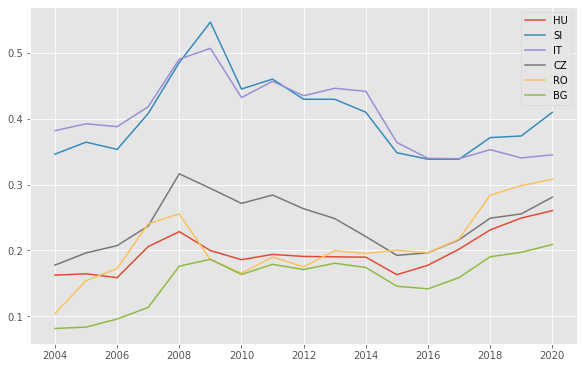

In [41]:
# Europe 1 - single states
unido_ulc_gr = unido_ulc.groupby(['country_code'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(unido_ulc_gr.get_group(('HU'))['year'], unido_ulc_gr.get_group(('HU'))['ULC'], label='HU')
    ax.plot(unido_ulc_gr.get_group(('SI'))['year'], unido_ulc_gr.get_group(('SI'))['ULC'], label='SI')
    #ax.plot(unido_ulc_gr.get_group(('DE'))['year'], unido_ulc_gr.get_group(('DE'))['ULC'], label='DE')
    ax.plot(unido_ulc_gr.get_group(('IT'))['year'], unido_ulc_gr.get_group(('IT'))['ULC'], label='IT')
    ax.plot(unido_ulc_gr.get_group(('CZ'))['year'], unido_ulc_gr.get_group(('CZ'))['ULC'], label='CZ')
    ax.plot(unido_ulc_gr.get_group(('RO'))['year'], unido_ulc_gr.get_group(('RO'))['ULC'], label='RO')
    ax.plot(unido_ulc_gr.get_group(('BG'))['year'], unido_ulc_gr.get_group(('BG'))['ULC'], label='BG')
    #ax.plot(unido_ulc_gr.get_group(('GB'))['year'], unido_ulc_gr.get_group(('GB'))['ULC'], label='UK')
    ax.legend()

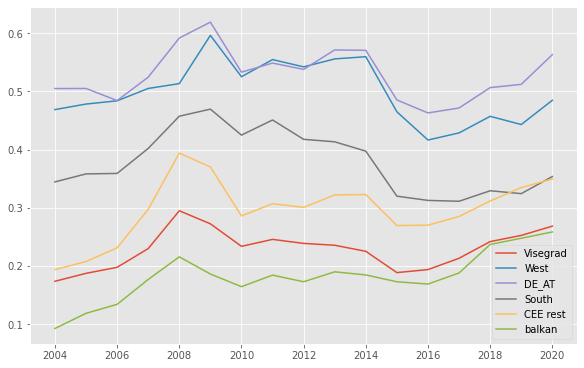

In [43]:
# Europe 2 - groups
unido_ulc_regions = unido_ulc.groupby(['region', 'year']).agg({'ULC': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(unido_ulc_regions.get_group(('visegrad'))['year'], unido_ulc_regions.get_group(('visegrad'))['ULC'], label='Visegrad')
    ax.plot(unido_ulc_regions.get_group(('west'))['year'], unido_ulc_regions.get_group(('west'))['ULC'], label='West')
    ax.plot(unido_ulc_regions.get_group(('DE_AT'))['year'], unido_ulc_regions.get_group(('DE_AT'))['ULC'], label='DE_AT')
    ax.plot(unido_ulc_regions.get_group(('south'))['year'], unido_ulc_regions.get_group(('south'))['ULC'], label='South')
    ax.plot(unido_ulc_regions.get_group(('CEE_non_core'))['year'], unido_ulc_regions.get_group(('CEE_non_core'))['ULC'], label='CEE rest')
    ax.plot(unido_ulc_regions.get_group(('balkan'))['year'], unido_ulc_regions.get_group(('balkan'))['ULC'], label='balkan')

    ax.legend()

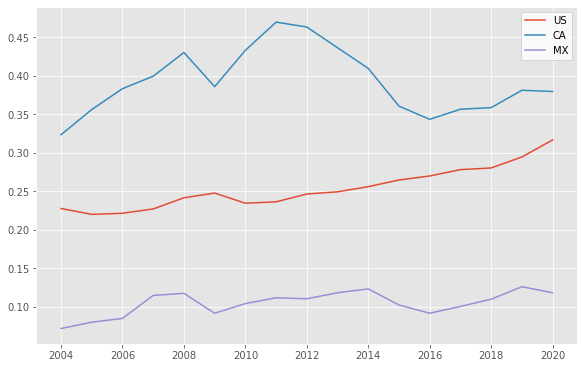

In [11]:
# North America
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(unido_ulc_gr.get_group(('US'))['year'], unido_ulc_gr.get_group(('US'))['ULC'], label='US')
    ax.plot(unido_ulc_gr.get_group(('CA'))['year'], unido_ulc_gr.get_group(('CA'))['ULC'], label='CA')
    ax.plot(unido_ulc_gr.get_group(('MX'))['year'], unido_ulc_gr.get_group(('MX'))['ULC'], label='MX')
ax.legend()

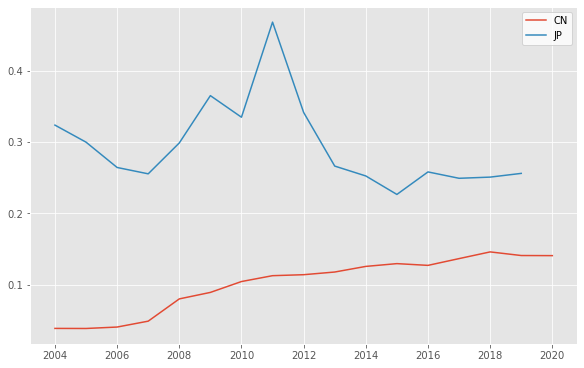

In [12]:
# South-East Asia
# TODO: missing Korea
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(unido_ulc_gr.get_group(('CN'))['year'], unido_ulc_gr.get_group(('CN'))['ULC'], label='CN')
    #ax.plot(unido_ulc_gr.get_group(('KP'))['year'], unido_ulc_gr.get_group(('KP'))['ULC'], label='KR') #TODO: some trouble with codes, fix
    ax.plot(unido_ulc_gr.get_group(('JP'))['year'], unido_ulc_gr.get_group(('JP'))['ULC'], label='JP')
ax.legend()

### ULC - Manufacturing relationship

In [228]:
manu_spec_ulc.head()

,country_code,ULC,year,country_name,employ_share,gva_share
0,AT,0.444351,2005,Austria,15.5,17.4
1,AT,0.433502,2006,Austria,15.4,17.8
2,AT,0.476039,2007,Austria,15.6,18.2
3,AT,0.541179,2008,Austria,15.4,17.4
4,AT,0.559551,2009,Austria,14.7,16.4


In [253]:
manu_spec_ulc = unido_ulc.merge(spec_employ, left_on=['country_code', 'year'], right_on=['Country', 'year'])
manu_spec_ulc = manu_spec_ulc.merge(spec_gva, left_on=['country_code', 'year'], right_on=['Country', 'year'])[['country_code', 'ULC', 'year', 'country_name', 'employ_share', 'gva_share']]

manu_spec_ulc = manu_spec_ulc.merge(manu_spec_ulc[(manu_spec_ulc['year'] == 2005)][['ULC', 'country_code', 'employ_share', 'gva_share']], 
                                    on='country_code', suffixes=[None, '_05'])
manu_spec_ulc['ULC_diff_19_05'] = manu_spec_ulc['ULC'] - manu_spec_ulc['ULC_05']
manu_spec_ulc['employ_share_diff_19_05'] = manu_spec_ulc['employ_share'] - manu_spec_ulc['employ_share_05']
manu_spec_ulc['gva_share_diff_19_05'] = manu_spec_ulc['gva_share'] - manu_spec_ulc['gva_share_05']


manu_spec_ulc_eu_19 = manu_spec_ulc[(manu_spec_ulc['year'] == 2019) & (manu_spec_ulc['country_code'].isin(eu.keys()))]
manu_spec_ulc_19 = manu_spec_ulc[(manu_spec_ulc['year'] == 2019) & (manu_spec_ulc['country_code'] != 'RS')].dropna()
manu_spec_ulc_19.sort_values('ULC')

,country_code,ULC,year,country_name,employ_share,gva_share,ULC_05,employ_share_05,gva_share_05,ULC_diff_19_05,employ_share_diff_19_05,gva_share_diff_19_05
222,IE,0.107434,2019,Ireland,12.1,31.6,0.249945,14.2,19.6,-0.142511,-2.1,12.0
46,BG,0.196971,2019,Bulgaria,17.8,13.4,0.083381,19.7,13.5,0.113590,-1.9,-0.1
350,PL,0.207935,2019,Poland,21.1,16.9,0.132027,20.5,16.0,0.075908,0.6,0.9
190,HU,0.249061,2019,Hungary,18.9,17.4,0.164369,21.0,19.0,0.084692,-2.1,-1.6
94,CZ,0.255397,2019,Czech Republic,25.0,22.6,0.196082,26.7,22.6,0.059315,-1.7,0.0
62,HR,0.269372,2019,Croatia,17.5,11.9,0.231233,19.4,14.3,0.038139,-1.9,-2.4
254,LV,0.282615,2019,Latvia,13.8,10.6,0.130731,16.7,11.4,0.151883,-2.9,-0.8
1422,SK,0.297605,2019,Slovak Republic,21.8,19.8,0.256834,23.5,20.6,0.040771,-1.7,-0.8
382,RO,0.298282,2019,Romania,19.2,17.2,0.153906,21.3,21.3,0.144376,-2.1,-4.1
270,LT,0.328931,2019,Lithuania,16.4,16.1,0.152002,18.2,18.3,0.176928,-1.8,-2.2


#### 2019 to 2019

GVA
const    19.283027
ULC     -12.799422
dtype: float64
Employment
const    25.419642
ULC     -26.963304
dtype: float64


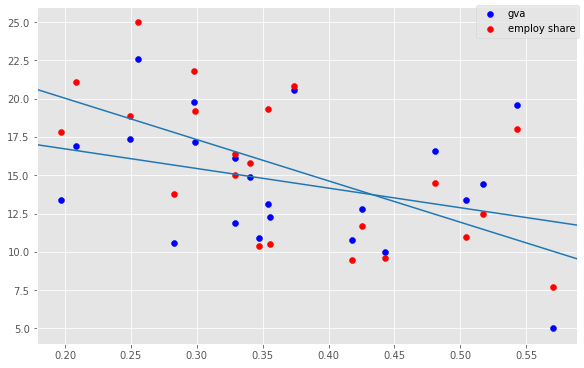

In [254]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))

    print('GVA')
    ax.scatter(manu_spec_ulc_eu_19['ULC'], manu_spec_ulc_eu_19['gva_share'], label = 'gva', c='b')
    plot_ols_trend(manu_spec_ulc_eu_19['gva_share'], manu_spec_ulc_eu_19['ULC'], ax)

    print('Employment')
    ax.scatter(manu_spec_ulc_eu_19['ULC'], manu_spec_ulc_eu_19['employ_share'], label = 'employ share', c='r')
    plot_ols_trend(manu_spec_ulc_eu_19['employ_share'], manu_spec_ulc_eu_19['ULC'], ax)

    fig.legend()



GVA
const    21.529635
ULC     -19.746349
dtype: float64
Employment
const    20.393339
ULC     -15.312791
dtype: float64


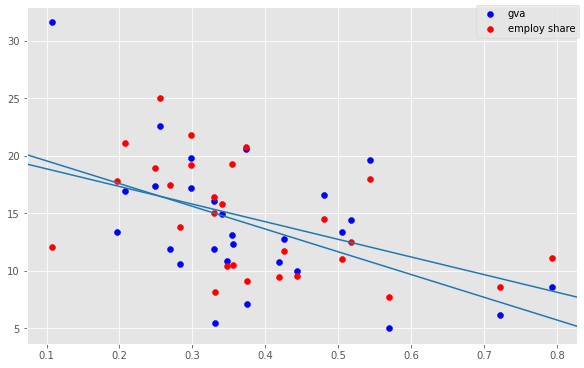

In [256]:
# NOTE: this is EU extended
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))

    print('GVA')
    ax.scatter(manu_spec_ulc_19['ULC'], manu_spec_ulc_19['gva_share'], label = 'gva', c='b')
    plot_ols_trend(manu_spec_ulc_19['gva_share'], manu_spec_ulc_19['ULC'], ax)

    print('Employment')
    ax.scatter(manu_spec_ulc_19['ULC'], manu_spec_ulc_19['employ_share'], label = 'employ share', c='r')
    plot_ols_trend(manu_spec_ulc_19['employ_share'], manu_spec_ulc_19['ULC'], ax)

    fig.legend()



#### Initial conditions (2005 to 2019)

GVA - initial ULC
const     16.713607
ULC_05    -6.315386
dtype: float64
Employment - initial ULC
const     21.160882
ULC_05   -16.686625
dtype: float64


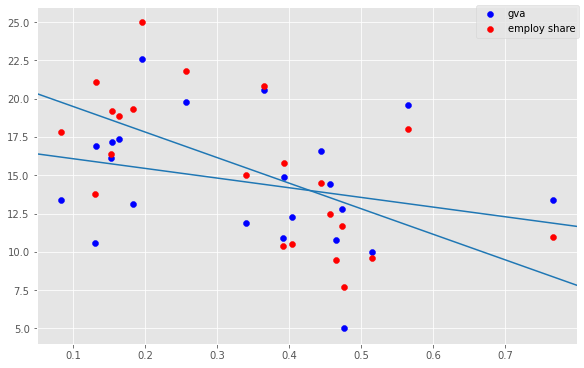

In [258]:

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))

    print('GVA - initial ULC')
    ax.scatter(manu_spec_ulc_eu_19['ULC_05'], manu_spec_ulc_eu_19['gva_share'], label = 'gva', c='b')
    plot_ols_trend(manu_spec_ulc_eu_19['gva_share'], manu_spec_ulc_eu_19['ULC_05'], ax)

    print('Employment - initial ULC')
    ax.scatter(manu_spec_ulc_eu_19['ULC_05'], manu_spec_ulc_eu_19['employ_share'], label = 'employ share', c='r')
    plot_ols_trend(manu_spec_ulc_eu_19['employ_share'], manu_spec_ulc_eu_19['ULC_05'], ax)

    fig.legend()

GVA - initial ULC
const     17.559782
ULC_05   -10.328817
dtype: float64
Employment - initial ULC
const     20.224547
ULC_05   -16.385175
dtype: float64


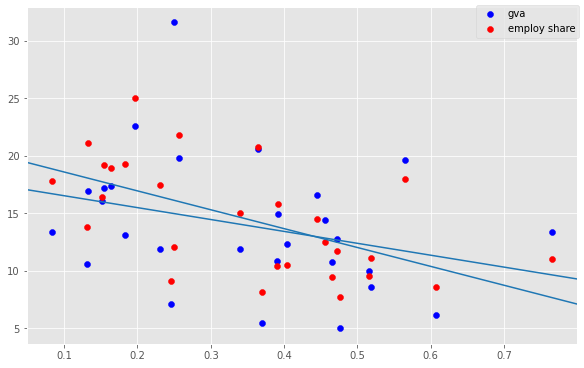

In [260]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))

    print('GVA - initial ULC')
    ax.scatter(manu_spec_ulc_19['ULC_05'], manu_spec_ulc_19['gva_share'], label = 'gva', c='b')
    plot_ols_trend(manu_spec_ulc_19['gva_share'], manu_spec_ulc_19['ULC_05'], ax)

    print('Employment - initial ULC')
    ax.scatter(manu_spec_ulc_19['ULC_05'], manu_spec_ulc_19['employ_share'], label = 'employ share', c='r')
    plot_ols_trend(manu_spec_ulc_19['employ_share'], manu_spec_ulc_19['ULC_05'], ax)

    fig.legend()

### UNIDO - Summary
#### Europe
- CEE are still really competitive despite an ULC increase in recent years
- Note - a) CEE rest has higher ULC and they are rather diverging in the last period (but this is probably driven by SI and Baltic)
- RO + BG seem to have similar ULC as the CEE manu core (!)
- South - note the sharp decline in the ULC 2012
- Note the sharp decline of the West (apart from Germany) - otherwise not much suprises

#### North America
- MX = as expected
- CA has by far biggest ULC
- There is certain convergence between CA and US recently

#### South-East Asia
- Japan = ULC decline
- China unsurprising 
- TODO missing Korea

### More detailed analysis: TiVA - 
#### see here: https://www.oecd.org/sti/ind/measuring-trade-in-value-added.htm and more directly here: https://stats.oecd.org//Index.aspx?DataSetCode=TIVA_2021_C1

TODO:
- Finish the Dustmann (2014) Fig.1 - add exchange rates
- ULC in absolute values - total wage bill w_it*L_it divided by the value added of the country’s industry Y_it (see Dustmann, 2014 Fig.1)
- ULC for other Baldwin's GVC Factories - get the data
- Read the original Stöllinger paper - is CEE still a manu core?
- Both VA and Employment seem to rise/fall together - should not be VA more persistent according to Baumol?
- get Real Unit Labour Costs!!!!!
- Golub's Value Added deflator - derive from World Bank (see above, perhaps robustness)